#### Entrega 7: Visualització gràfica d'un dataset
##### Valeria Orozco Castiblanco

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Entrega 6\DelayedFlights.csv') 
dataframe = pd.DataFrame(data)
dataframe.columns = dataframe.columns.str.replace(' ', '')

dataframe.head()


,Unnamed:0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [21]:
dataframe.drop(['Unnamed:0'], axis= 1, inplace =True)


Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)
* Una variable numèrica (ArrDelay)
* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
* Dues variables numèriques (ArrDelay i DepDelay)
* Tres variables (ArrDelay, DepDelay i UniqueCarrier)
* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

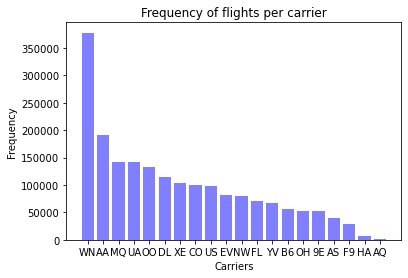

In [32]:
### ONLY CATEGORICAL VARIABLE ###
##Ask Laura about how to sort a histogram
figure, ax = plt.subplots()
y= dataframe['UniqueCarrier'].value_counts()
ax.bar(y.index, y,facecolor = 'blue', alpha = 0.5) 
plt.title('Frequency of flights per carrier')
plt.xlabel('Carriers')
plt.ylabel('Frequency')
plt.show()



 
* WN is the carrier with most frequent flights, followed by AA


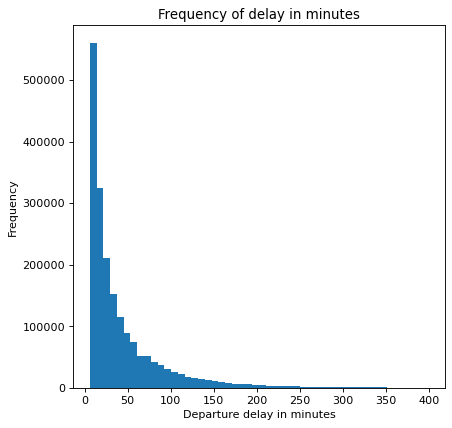

In [46]:
### ONLY NUMERIC VARIABLE ###
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.subplots()
ax.ticklabel_format(useOffset=False, style= 'plain')

x = dataframe[dataframe['DepDelay']<400]    
ax.hist(x['DepDelay'], bins= 50)
plt.xlabel('Departure delay in minutes')
plt.title('Frequency of delay in minutes')
plt.ylabel('Frequency')
plt.show()

print(x['DepDelay'].mean())

* It can be seen the time delay happens in between 0 and 40  minutes. 

<BarContainer object of 20 artists>

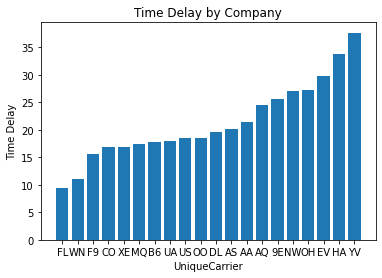

In [72]:
#SORTING BOTH NUMERIC AND CATEGORICAL VARIABLE

new_group = dataframe.groupby('UniqueCarrier')['CarrierDelay'].mean()
new_group.sort_values(inplace=True)
plt.title('Time Delay by Company')
plt.xlabel('UniqueCarrier')
plt.ylabel('Time Delay')
plt.bar(new_group.index, new_group)


* The Carrier with most delays on average is YV followed by HA
* The Carrier with least delays on average is FL followed by WN

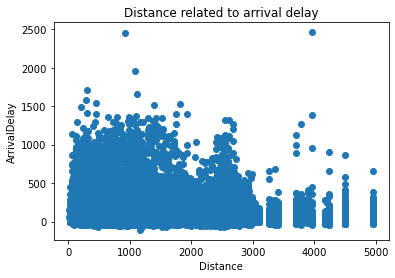

In [57]:
# 2 numerical variables

x = dataframe['Distance']
y =  dataframe['ArrDelay']
plt.title('Distance related to arrival delay')
plt.xlabel('Distance')
plt.ylabel('ArrivalDelay')
plt.scatter(x,y)


* It can be seen the variables Distance and Arrival Delay do not have a relationship

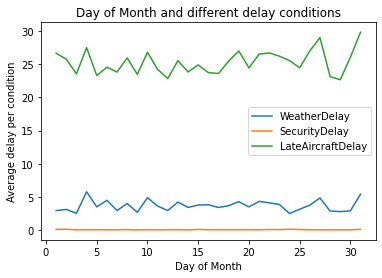

In [71]:
# 3 numerical variables
figure = dataframe.groupby('DayofMonth')[['WeatherDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().plot()
plt.ticklabel_format(useOffset=False, style= 'plain')
plt.title('Day of Month and different delay conditions')
plt.xlabel('Day of Month')
plt.ylabel('Average delay per condition')
plt.legend()
plt.show()

* There are no delays caused by security in any day of the month
* In average, the delays are normally due to late Aircraft, and they mainly happen at the end of the month.
* A delay caused by weather is on average less than 10 minutes. 

C:\Users\vaorc\AppData\Local\Temp/ipykernel_25608/2873695125.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  figure = dataframe.groupby('Month')['WeatherDelay','CarrierDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay'].sum().plot()


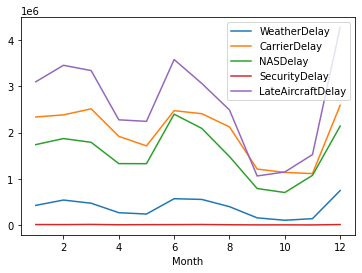

In [67]:
#More than 3 numerical variables
figure = dataframe.groupby('Month')['WeatherDelay','CarrierDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay'].sum().plot()
plt.ticklabel_format(useOffset=False, style= 'plain')


* It can be seen there were no security delays during the whole year.
* The most common reason for delay during the year was LateAircraftDelay, specially during November and December.
* Weather Delays tend to increase from November on, probably due to winter conditions.